## How do weather patterns (rain, temperature, ect.) affect the occurance of specific types of citations in Scottsdale AZ?

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
weather = pd.read_csv('data/Scottsdale_historical_weather.csv',
                     parse_dates=['DATE'],
                     index_col='DATE')
citations = pd.read_csv('https://raw.githubusercontent.com/mrkjhsn/Scottsdale_Datasets/master/citations.csv',
                       parse_dates=['Citation Date'],
                       index_col='Citation Date')

C:\Users\mrkjh\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [49]:
weather.dtypes

STATION     object
NAME        object
AWND       float64
PGTM       float64
PRCP       float64
SNOW       float64
SNWD       float64
TAVG       float64
TMAX       float64
TMIN       float64
WDF2       float64
WDF5       float64
WSF2       float64
WSF5       float64
WT01       float64
WT02       float64
WT03       float64
WT07       float64
WT08       float64
dtype: object

In [50]:
weather.head()

,STATION,NAME,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT07,WT08
DATE,,,,,,,,,,,,,,,,,,,
2016-01-01,USW00003192,"SCOTTSDALE MUNICIPAL AIRPORT, AZ US",1.34,NaN,0.00,0.0,0.0,NaN,66.0,35.0,90.0,90.0,8.1,11.0,NaN,NaN,NaN,NaN,NaN
2016-01-02,USW00003192,"SCOTTSDALE MUNICIPAL AIRPORT, AZ US",2.01,NaN,0.00,0.0,0.0,NaN,69.0,43.0,150.0,260.0,6.9,11.0,NaN,NaN,NaN,NaN,NaN
2016-01-03,USW00003192,"SCOTTSDALE MUNICIPAL AIRPORT, AZ US",4.25,NaN,0.00,0.0,0.0,NaN,69.0,46.0,90.0,90.0,15.0,19.9,NaN,NaN,NaN,NaN,NaN
2016-01-04,USW00003192,"SCOTTSDALE MUNICIPAL AIRPORT, AZ US",6.49,NaN,0.45,0.0,0.0,NaN,65.0,51.0,120.0,110.0,16.1,23.9,NaN,NaN,NaN,NaN,NaN
2016-01-05,USW00003192,"SCOTTSDALE MUNICIPAL AIRPORT, AZ US",3.36,NaN,0.18,0.0,0.0,NaN,55.0,51.0,110.0,110.0,13.0,17.0,NaN,NaN,NaN,NaN,NaN


In [16]:
weather['DATE'] = pd.to_datetime(weather['DATE'])

In [93]:
# exclude information about weather station
weather = weather.iloc[:, 2:]

### The meaning behind the weather  abbreviations
https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf

- AWND = Average daily wind speed (meters per second or miles per hour as per user preference) 
- PGTM = Peak gust time (hours and minutes, i.e., HHMM)
- PRCP = Precipitation (mm or inches as per user preference, inches to hundredths on Daily Form pdf file)
- TMAX = Maximum temperature (Fahrenheit or Celsius as per user preference, Fahrenheit to tenths on Daily Form pdf file
- TMIN = Minimum temperature (Fahrenheit or Celsius as per user preference, Fahrenheit to tenths on Daily Form pdf file
- WDF2 = Direction of fastest 2-minute wind (degrees)
- WDF5 = Direction of fastest 5-second wind (degrees)
- WSF2 = Fastest 2-minute wind speed (miles per hour or meters per second as per user preference)
- WSF5 = Fastest 5-second wind speed (miles per hour or meters per second as per user preference)
- WT** = Weather Type where ** has one of the following values: 
 - 01 = Fog, ice fog, or freezing fog (may include heavy fog)
 - 02 = Heavy fog or heaving freezing fog (not always distinguished from fog)
 - 03 = Thunder
 - 07 = Dust, volcanic ash, blowing dust, blowing sand, or blowing obstruction
 - 08 = Smoke or haze
 
 

In [21]:
# clearly there has been no snow during the time period of the data
weather[weather.SNOW == 1]

,DATE,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT07,WT08


In [92]:
# remove columns for wind direction
# and snow
weather.drop([
    'SNOW',
    'WDF2',
    'WDF5'
], axis=1, inplace=True)

KeyError: "['SNOW' 'WDF2' 'WDF5'] not found in axis"

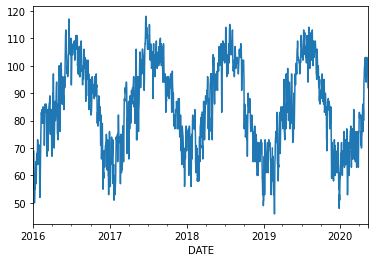

In [104]:
# plot temerature to confirm the seasonal trend
weather.TMAX.plot();

This appears to be as expected.

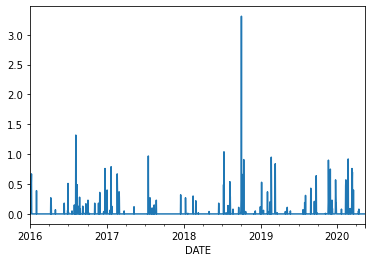

In [105]:
weather.PRCP.plot();

I didn't fully appreciate how much rain fell in the summer of 2018.

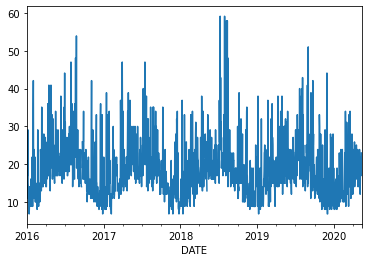

In [106]:
weather.WSF5.plot();

Interesting to see how wind speeds typically pick up during the hottest months of the year.  This seems consistent since winds often stoke wildfires during the hot, dry months of the year.

### Join weather data to citation data

In [52]:
citations.dtypes

Citation #                     int64
Arizona Statute Code          object
Beat                         float64
Charge Description            object
Citation Time                  int64
Citation Type Code            object
Citation Type Description     object
Cited Person                  object
Cited Person Age              object
Cited Person Ethnicity        object
Cited Person Race             object
Cited Person Sex              object
City                          object
District                      object
Officer Badge #               object
State                         object
Street                        object
Street Number                 object
Zip                           object
Zone                          object
tcmainid                       int64
dtype: object

In [57]:
# join together citations and weather data
df = citations.merge(weather, left_index=True, right_index=True)

In [58]:
df.shape

(61046, 37)

In [59]:
df.head()

,Citation #,Arizona Statute Code,Beat,Charge Description,Citation Time,Citation Type Code,Citation Type Description,Cited Person,Cited Person Age,Cited Person Ethnicity,...,TAVG,TMAX,TMIN,WSF2,WSF5,WT01,WT02,WT03,WT07,WT08
2017-09-23,2008783,19-19A,6.0,Urinate/Defecate In Public,216,MC,Municipal Code,"Cwik, David",32,N,...,NaN,83.0,62.0,14.1,21.0,NaN,NaN,NaN,NaN,NaN
2017-09-23,2019096,13-1502A1,6.0,Criminal Trespass 3rd Deg-Property,220,CR,Criminal,"Batashvili, Ezra",31,N,...,NaN,83.0,62.0,14.1,21.0,NaN,NaN,NaN,NaN,NaN
2017-09-23,2018631,28-1381A1,13.0,DUI-Impaired to Slightest Degree,234,CT,Criminal Traffic,"Gaster, JOshua",30,N,...,NaN,83.0,62.0,14.1,21.0,NaN,NaN,NaN,NaN,NaN
2017-09-23,8085524,28-1381A1,1.0,DUI-Impaired to Slightest Degree,230,CT,Criminal Traffic,"Luna, Miguel",20,H,...,NaN,83.0,62.0,14.1,21.0,NaN,NaN,NaN,NaN,NaN
2017-09-23,2020407,28-622A,1.0,Fail to Comply With Police Officer,201,CT,Criminal Traffic,"Renteria, Rodolfo",39,H,...,NaN,83.0,62.0,14.1,21.0,NaN,NaN,NaN,NaN,NaN


In [76]:
# aggregate citations and weather
citations_agg_by_day = citations.groupby([citations.index, 'Charge Description']).size().unstack()

citations_with_weather = citations_agg_by_day.merge(weather, left_index=True, right_index=True)

In [84]:
citations_with_weather.head(20)

,2 Emergency Brake App-Air Sys,2 Headlamps Required For Motor Vehicles,Accident-Strike Fixture-Fail to Stop/Notify Owner,Accidents - Fail to Give Info-Name Add Etc.,Accidents - Fail to Leave Required Info,Accidents - Fail to Locate Owner,Accidents - Fail to Remain-Damage Attended Veh,Accidents - Fail to Remain-Injury or Death,Accidents - Fail to Show Driver`s License,Accidents - Fail to Stop-Damage Attended Vehicle,...,TAVG,TMAX,TMIN,WSF2,WSF5,WT01,WT02,WT03,WT07,WT08
2017-09-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,83.0,62.0,14.1,21.0,NaN,NaN,NaN,NaN,NaN
2017-09-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,85.0,59.0,12.1,16.1,NaN,NaN,NaN,NaN,NaN
2017-09-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,88.0,57.0,8.9,12.1,NaN,NaN,NaN,NaN,NaN
2017-09-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,87.0,58.0,10.1,13.0,NaN,NaN,NaN,NaN,NaN
2017-09-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,90.0,66.0,12.1,16.1,NaN,NaN,NaN,NaN,NaN
2017-09-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,93.0,62.0,8.9,12.1,NaN,NaN,NaN,NaN,NaN
2017-09-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,96.0,68.0,12.1,15.0,NaN,NaN,NaN,NaN,NaN
2017-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,96.0,66.0,14.1,18.1,NaN,NaN,NaN,NaN,NaN
2017-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,95.0,66.0,10.1,14.1,NaN,NaN,NaN,NaN,NaN
2017-10-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,89.0,67.0,13.0,19.9,NaN,NaN,NaN,NaN,NaN


In [86]:
# correlations for all citations and weather
# this is a bit hard to sort through
citations_with_weather.corr().abs().unstack().sort_values(ascending=False).head(50)

WSF5                                                        WSF5                                                          1.0
No Business License                                         Liquor-Consume In Public                                      1.0
Parking to Obstruct Traffic                                 Loading or Unloading In Through Lane                          1.0
                                                            Criminal Littering-Litter Free Enforce Zone                   1.0
                                                            Criminal Damage-Deface (Vehicle)                              1.0
Parking Where Signs Prohibit                                Parking Where Signs Prohibit                                  1.0
                                                            Hov Violation                                                 1.0
                                                            Expired Out-Of-State Registration                         

In [89]:
# subset only accident citations
speed_accident = citations[citations['Charge Description'] == "Failure to Control Speed to Avoid A Collision"]

In [98]:
# identify weather correlations with Failure to Control Speed citations
speed_accident.groupby([speed_accident.index, 'Charge Description']) \
.size().unstack() \
.merge(weather, left_index=True, right_index=True).corr().abs().unstack().sort_values(ascending=False).head(50)

WSF5                                           WSF5                                             1.000000
WSF2                                           WSF2                                             1.000000
AWND                                           AWND                                             1.000000
PGTM                                           PGTM                                             1.000000
PRCP                                           PRCP                                             1.000000
TMAX                                           TMAX                                             1.000000
TMIN                                           TMIN                                             1.000000
Failure to Control Speed to Avoid A Collision  Failure to Control Speed to Avoid A Collision    1.000000
WSF2                                           WSF5                                             0.974918
WSF5                                           WSF2    